In [13]:
library(readr)
library(dplyr)
library(ggplot2)


players <- read_csv("dsci1000/players.csv", show_col_types = FALSE)
sessions <- read_csv("dsci1000/sessions.csv", show_col_types = FALSE)


cat("Players:", nrow(players), "rows\n")
cat("Sessions:", nrow(sessions), "rows\n")

sessions <- sessions |>
  mutate(session_minutes = (as.numeric(original_end_time) - as.numeric(original_start_time)) / (1000 * 60))

session_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    sessions_count = n(),
    avg_session_minutes = mean(session_minutes, na.rm = TRUE)
  )

players_joined <- players |>
  left_join(session_summary, by = "hashedEmail")


players |>
  summarise_all(~ mean(is.na(.)) * 100)


Players: 196 rows
Sessions: 1535 rows


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,1.020408


played_hours,Age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


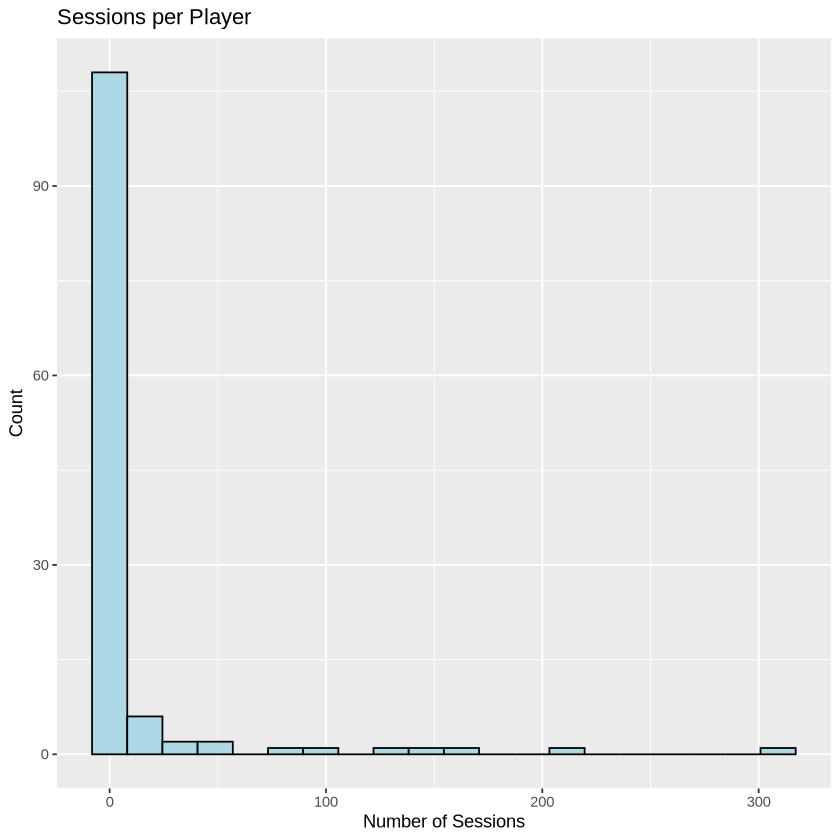

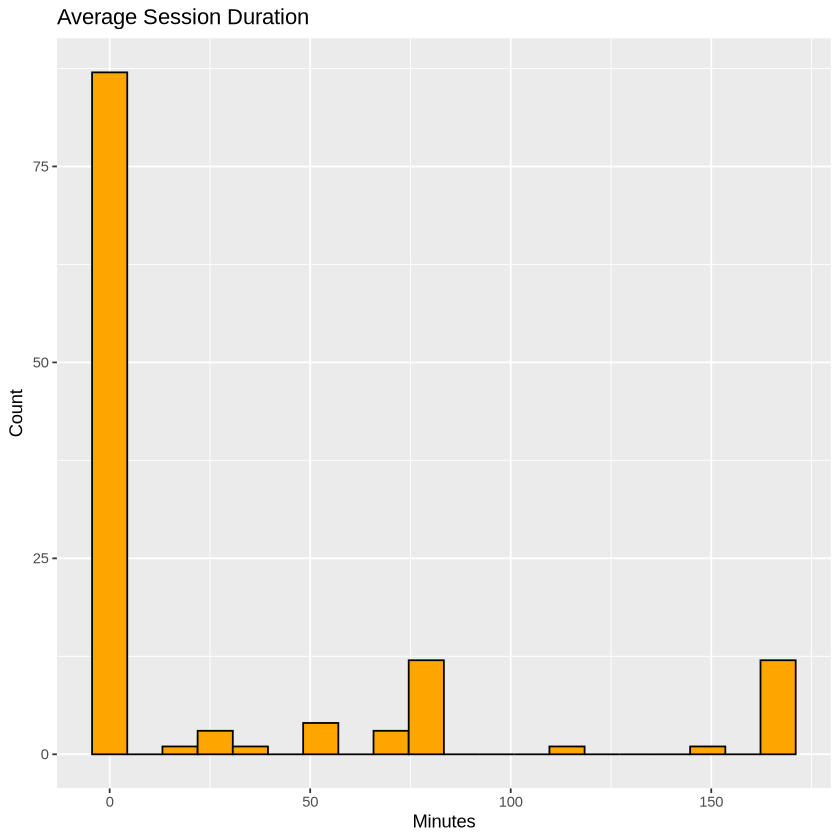

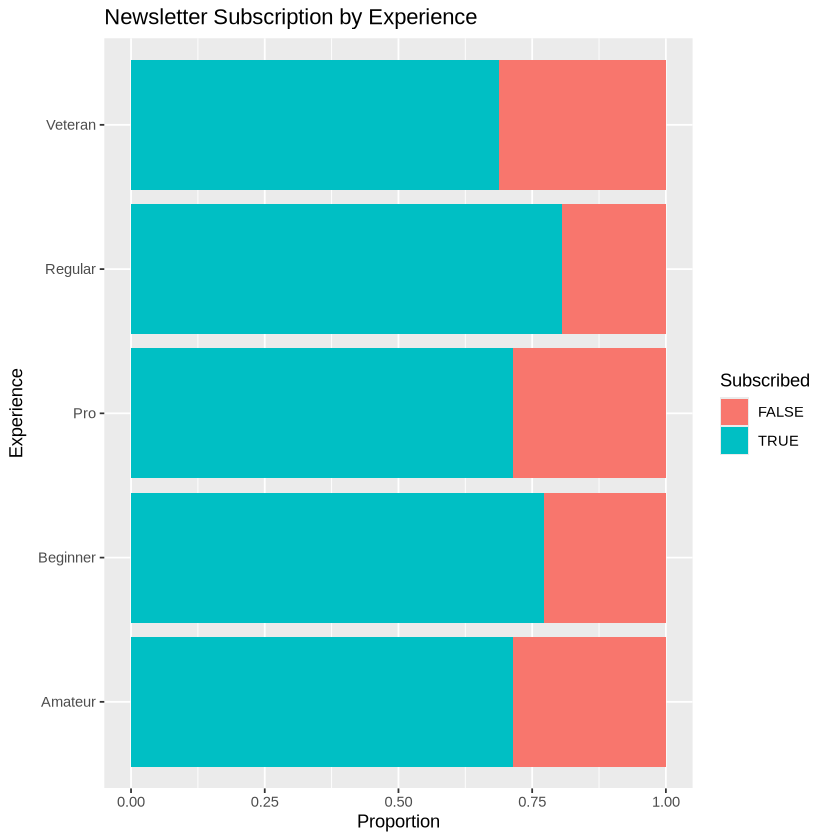

In [14]:
players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

players_joined |>
  ggplot(aes(x = sessions_count)) +
  geom_histogram(bins = 20, fill = "lightblue", color = "black") +
  labs(title = "Sessions per Player", x = "Number of Sessions", y = "Count")

players_joined |>
  ggplot(aes(x = avg_session_minutes)) +
  geom_histogram(bins = 20, fill = "orange", color = "black") +
  labs(title = "Average Session Duration", x = "Minutes", y = "Count")

players_joined |>
  ggplot(aes(x = experience, fill = as.factor(subscribe))) +
  geom_bar(position = "fill") +
  coord_flip() +
  labs(title = "Newsletter Subscription by Experience",
       x = "Experience", y = "Proportion", fill = "Subscribed")


 Observations
- Most players have very few sessions.
- Experienced players seem more likely to subscribe.
- Some sessions last zero minutes (likely a data logging issue).


 (4) Methods and Plan


For this project, I plan to use a simple comparison and visualization approach to explore the relationship between player characteristics and newsletter subscription. Because the main goal is to understand patterns in the data rather than make formal predictions, this descriptive method is the most appropriate for what we have learned so far.
Why this method is appropriate:
This approach focuses on using summaries (such as group averages) and plots (such as bar charts and histograms) to compare subscribers and non-subscribers. It is suitable because our dataset is small, and we have not yet covered statistical or predictive models. The method still allows us to identify which variables—like playtime, experience, or number of sessions—appear to differ between groups.
Assumptions:
The main assumption is that each player is an independent observation. We also assume that the data in the CSV files are accurate and represent the player population reasonably well.
Limitations:
This method cannot make predictions for new players; it only describes existing relationships. It also does not control for other factors that might influence results. Some session durations may be recorded incorrectly (for example, zero-minute sessions), and this could slightly affect averages.
How I will compare and select results:
I will compare patterns visually and through summary statistics, such as the average number of sessions or average playtime for each group. I will check which characteristics show the biggest difference between subscribers and non-subscribers. The goal is not to “select a model,” but to identify which variables seem most related to subscription.
How I will process the data:
I will first combine the player and session datasets using the hashedEmail column. Then I will clean any missing or zero values, and calculate summary statistics per player (like total playtime and average session length). If I later move to a simple classification or correlation method, I would split the data into a training set (80%) and a testing set (20%) to check if the findings are consistent, but for now my analysis will stay descriptive and use the full dataset.
